### IBM Data Science Course 
#### Capstone Project

In [25]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import warnings

#Suppressing all warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [26]:
### Loading of Heart Failure Data 
## Reference: Chicco, D., Jurman, G. Machine learning can predict survival of patients with heart failure from serum creatinine and ejection fraction alone. BMC Med Inform Decis Mak 20, 16 (2020). https://doi.org/10.1186/s12911-020-1023-5

df=pd.read_csv('S1Data.csv')

In [27]:
df.head()

,TIME,Event,Gender,Smoking,Diabetes,BP,Anaemia,Age,Ejection.Fraction,Sodium,Creatinine,Pletelets,CPK
0,97,0,0,0,0,0,1,43.0,50,135,1.30,237000.00,358
1,180,0,1,1,1,0,1,73.0,30,142,1.18,160000.00,231
2,31,1,1,1,0,1,0,70.0,20,134,1.83,263358.03,582
3,87,0,1,0,0,0,1,65.0,25,141,1.10,298000.00,305
4,113,0,1,0,0,0,0,64.0,60,137,1.00,242000.00,1610


##### Total samples

In [28]:
print(len(df))

299


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   TIME               299 non-null    int64  
 1   Event              299 non-null    int64  
 2   Gender             299 non-null    int64  
 3   Smoking            299 non-null    int64  
 4   Diabetes           299 non-null    int64  
 5   BP                 299 non-null    int64  
 6   Anaemia            299 non-null    int64  
 7   Age                299 non-null    float64
 8   Ejection.Fraction  299 non-null    int64  
 9   Sodium             299 non-null    int64  
 10  Creatinine         299 non-null    float64
 11  Pletelets          299 non-null    float64
 12  CPK                299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


#### Event (i.e death event) is the target variable

In [30]:
df.columns

Index(['TIME', 'Event', 'Gender', 'Smoking', 'Diabetes', 'BP', 'Anaemia',
       'Age', 'Ejection.Fraction', 'Sodium', 'Creatinine', 'Pletelets', 'CPK'],
      dtype='object')

#### No Null values in the dataset

In [31]:
df.isnull().sum()

TIME                 0
Event                0
Gender               0
Smoking              0
Diabetes             0
BP                   0
Anaemia              0
Age                  0
Ejection.Fraction    0
Sodium               0
Creatinine           0
Pletelets            0
CPK                  0
dtype: int64

## Data Analysis Section

### a) Data Distribution (features)

#### 1) Death counts (annotation here is 1 : Death, 0 : Survived)

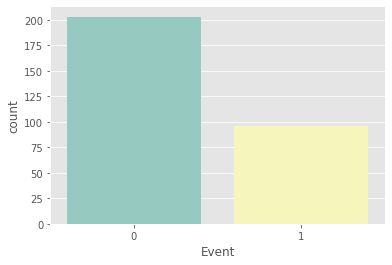

0    203
1     96
Name: Event, dtype: int64


In [32]:
sns.countplot(df["Event"], palette="Set2")
plt.show()
print(df.Event.value_counts())

#### 2) Overall Distribution (tabular)

In [33]:
df.describe()

,TIME,Event,Gender,Smoking,Diabetes,BP,Anaemia,Age,Ejection.Fraction,Sodium,Creatinine,Pletelets,CPK
count,299.000000,299.00000,299.000000,299.00000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000
mean,130.260870,0.32107,0.648829,0.32107,0.418060,0.351171,0.431438,60.833893,38.083612,136.625418,1.39388,263358.029264,581.839465
std,77.614208,0.46767,0.478136,0.46767,0.494067,0.478136,0.496107,11.894809,11.834841,4.412477,1.03451,97804.236869,970.287881
min,4.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,40.000000,14.000000,113.000000,0.50000,25100.000000,23.000000
25%,73.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,51.000000,30.000000,134.000000,0.90000,212500.000000,116.500000
50%,115.000000,0.00000,1.000000,0.00000,0.000000,0.000000,0.000000,60.000000,38.000000,137.000000,1.10000,262000.000000,250.000000
75%,203.000000,1.00000,1.000000,1.00000,1.000000,1.000000,1.000000,70.000000,45.000000,140.000000,1.40000,303500.000000,582.000000
max,285.000000,1.00000,1.000000,1.00000,1.000000,1.000000,1.000000,95.000000,80.000000,148.000000,9.40000,850000.000000,7861.000000


#### 3) Overall Distribution (Graphical)

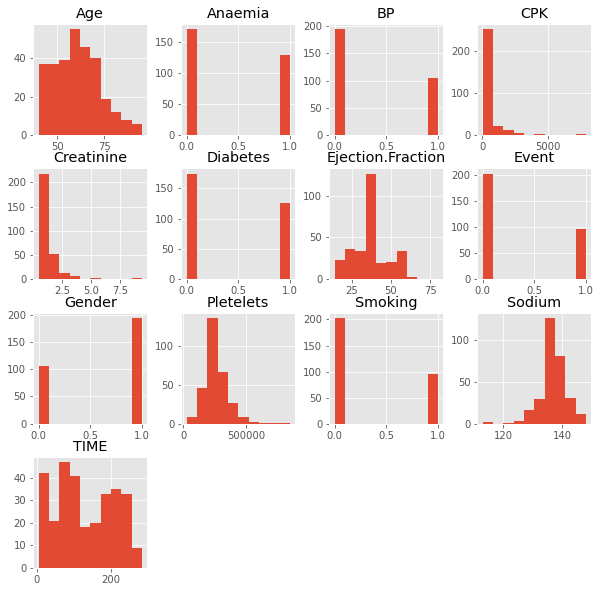

In [34]:
plt.style.use('ggplot')
p = df.hist(figsize=(10,10))

### b) Correlation Analysis

<AxesSubplot:>

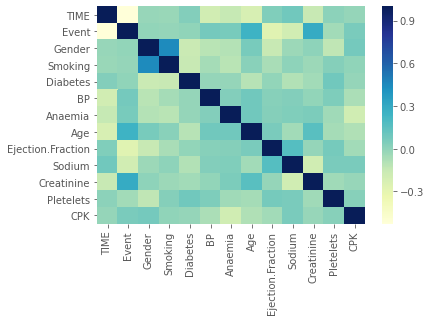

In [35]:
corr = df.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap="YlGnBu")

In [36]:
corr[abs(corr['Event']) > 0.1]['Event']

TIME                -0.526964
Event                1.000000
Age                  0.253729
Ejection.Fraction   -0.268603
Sodium              -0.195204
Creatinine           0.294278
Name: Event, dtype: float64

#### The features 'Age', 'Ejection.Fraction', 'Creatinine', 'Sodium', and 'TIME' have a considerable correlation with 'Event' (i.e death)

####################
## Model Building and Testing Section

In [37]:
small_df = df[['Age', 'Ejection.Fraction', 'Creatinine', 'Sodium', 'TIME']]
x=small_df
y=df['Event']

In [38]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=1,test_size=0.2)

### 1) Linear Regression

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
lr=LogisticRegression(max_iter=10000)
lr.fit(x_train,y_train)
p1=lr.predict(x_test)
s1=accuracy_score(y_test,p1)
print("Linear Regression Success Rate :", "{:.2f}%".format(100*s1))

Linear Regression Success Rate : 78.33%


### 2) Random Forest Classifier

In [40]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
p3=rfc.predict(x_test)
s3=accuracy_score(y_test,p3)
print("Random Forest Classifier Success Rate :", "{:.2f}%".format(100*s3))

Random Forest Classifier Success Rate : 83.33%


### 3) Support Vector Machine

In [41]:
from sklearn.svm import SVC
svm=SVC()
svm.fit(x_train,y_train)
p4=svm.predict(x_test)
s4=accuracy_score(y_test,p4)
print("Support Vector Machine Success Rate :", "{:.2f}%".format(100*s4))

Support Vector Machine Success Rate : 68.33%


### 4) K Nearest Neighbors

In [42]:
from sklearn.neighbors import KNeighborsClassifier
scorelist=[]
for i in range(1,21):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    p5=knn.predict(x_test)
    s5=accuracy_score(y_test,p5)
    scorelist.append(round(100*s5, 2))
print("K Nearest Neighbors Top 5 Success Rates:")
print(sorted(scorelist,reverse=True)[:5])

K Nearest Neighbors Top 5 Success Rates:
[81.67, 81.67, 81.67, 81.67, 81.67]


## Final Result of ML Approaches:

Linear Regression: 78.33%

Support Vector Machine: 75.00%

Random Forest Classifier: 68.33%

K Nearest Neighbors: 81.67%